<h1 style = "text-align: center;
             text-decoration: underline;"> 🔍 Projet de Machine Learning - Housing Price Prediction
 </h1>

<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">HOUSE PRICE PREDICTION 🏡</h1></center>


<center><img src="https://miro.medium.com/max/700/1*O0rdwWLe7wjTM9-nlW2Xxg.jpeg"></center>

### **Membres du groupe**
#### - AMEWOUAME Mawuéna Elisée
#### - KUISSU Paloma
#### - FAMARA Sadio
#### - NDIAYE Abdoulaye

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Modélisation</h1>
</div>

**<h3 style = "font-family: Century Schoolbook;
             "> Objectif: </h3>**

* <p style = "font-family: Century Schoolbook;
    font-size : 1.1em;"> Faire du preprocessing pour préparer les données. </p>

* <p style = "font-family: Century Schoolbook;
    font-size : 1.1em;"> Tester différents modèles pour déterminer celle qui donne le plus petit RMSE. </p>
    
* <p style = "font-family: Century Schoolbook;
    font-size : 1.1em;"> Améliorer le meilleur modèle par ses hyperparamètres </p>

In [165]:
from pathlib import Path
import warnings 
import missingno as msno
from itertools import combinations
import numpy as np
from ydata_profiling import ProfileReport 
import pandas as pd
from sklearn.feature_selection import RFECV
import plotly.express as px
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import (mean_absolute_error,
                     mean_absolute_percentage_error,
                     mean_squared_log_error,
                     max_error
                    )
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn. compose import make_column_transformer, make_column_selector

#import pandas_profiling as prf 
import matplotlib.pyplot as plt


# insstruction pour ne pas afficher les avertissements
warnings.filterwarnings('ignore')

# instruction permettant d'afficher, par défaut, toutes les lignes d'un dataframe
pd.set_option("display.max_row", 81)

# instruction permettant d'afficher, par défaut, toutes les colonnes d'un dataframe
pd.set_option("display.max_column", 81)

In [166]:
# définir le répertoire du projet contenant le dossier data/ et notebooks/
HOME_DIR = Path.cwd().parent
print(f"Home directory: {HOME_DIR}")

# définir le répertoire des données
DATA_DIR = Path(HOME_DIR, "data")
print(f"Data directory: {DATA_DIR}")


Home directory: C:\Users\DELL\Documents\Projet_machine_learning
Data directory: C:\Users\DELL\Documents\Projet_machine_learning\data


In [167]:
data = pd.read_excel(Path(DATA_DIR, "train_treated.xlsx"))

In [168]:
data.shape

(1459, 111)

**<h3 style = "font-family: Century Schoolbook" id = "importation">2.1- Preprocessing </h3>**

In [169]:
## la target 

X = data.drop('SalePrice', axis = 1)
Y = pd.DataFrame(data['SalePrice'])

In [170]:
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1454,175000
1455,210000
1456,266500
1457,142125


In [171]:
print(f'X.shape:{X.shape}\nY.shape: {Y.shape}')

X.shape:(1459, 110)
Y.shape: (1459, 1)


In [172]:
## standardization de X 
# Créer un objet StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données et les transformer
X = scaler.fit_transform(X)

# Afficher les cinq premières lignes du DataFrame résultant
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
0,1.258043,1.051641,-0.238199,0.583436,0.117925,-0.590828,1.164067,-0.277292,0.890777,0.736383,0.237129,-1.009031,0.319578,0.262638,0.265715,0.289852,-0.470064,-0.242448,0.518359,-0.419124,-0.760923,0.760923,-0.212436,-0.188378,-0.159056,0.337254,-0.468935,0.623058,-0.332190,2.954093,-0.271263,-0.427006,-0.289745,-1.217084,0.398568,-0.396255,0.443715,-0.307447,-0.291133,0.528984,...,-0.386942,0.390447,0.467847,-0.467847,0.073732,-0.229183,-0.207125,0.650852,-0.517424,1.051899,0.879449,0.510905,0.574748,-0.28876,-0.944607,-0.460570,-0.794191,1.162093,-0.120284,0.370055,1.107124,-0.241148,0.790180,1.228641,0.163837,-0.211529,0.912128,-0.951848,0.296143,0.311842,-0.751887,0.215983,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,0.138826,-0.257916
1,-0.621133,-0.689953,-0.238199,0.583436,0.117925,2.220099,0.689396,-0.277292,0.890777,-0.770465,0.237129,0.648203,0.319578,0.262638,0.265715,0.289852,-0.470064,-0.242448,0.518359,-0.419124,-0.760923,0.760923,-0.212436,-0.188378,-0.159056,0.337254,-0.468935,-1.604986,3.010327,-0.338513,-0.271263,-0.427006,-0.289745,0.821636,-2.508984,2.523626,0.443715,-0.307447,-0.291133,0.528984,...,-0.386942,0.390447,0.467847,-0.467847,-0.871979,0.451896,-0.091909,-0.072372,2.178727,0.157540,-0.428864,-0.574674,1.171304,-0.28876,-0.641330,0.465629,0.256426,-0.794554,-0.120284,-0.482514,-0.820434,3.947370,0.790180,-0.760912,0.163837,-0.211529,-0.318380,0.599824,0.236630,0.311842,1.625670,-0.704845,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-0.489318,-0.614137,-0.257916
2,1.258043,1.051641,-0.238199,0.583436,0.117925,0.346148,1.164067,-0.277292,0.890777,0.736383,0.237129,0.648203,0.319578,0.262638,0.265715,0.289852,-0.470064,-0.242448,0.518359,-0.419124,1.314193,-1.314193,-0.212436,-0.188378,-0.159056,0.337254,-0.468935,0.623058,-0.332190,2.954093,-0.271263,-0.427006,-0.289745,-1.217084,0.398568,-0.396255,0.443715,-0.307447,-0.291133,0.528984,...,-0.386942,0.390447,0.467847,-0.467847,0.073732,-0.092967,0.073401,0.650852,-0.517424,0.985650,0.830993,0.322590,0.092239,-0.28876,-0.301842,-0.314568,-0.628576,1.189587,-0.120284,0.514687,1.107124,-0.241148,0.790180,1.228641,0.163837,-0.211529,-0.318380,0.599824,0.291735,0.311842,-0.751887,-0.070832,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,0.990298,0.138826,-0.257916
3,1.258043,-0.689953,-0.238199,-0.557627,1.929008,-0.590828,0.689396,-0.277292,-0.151439,0.736383,0.237129,1.200614,-0.801250,0.262638,0.265715,0.289852,-0.470064,-0.242448,0.518359,-0.419124,1.314193,-1.314193,-0.212436,-0.188378,-0.159056,0.337254,2.132493,-1.604986,-0.332190,-0.338513,-0.271263,-0.427006,-0.289745,0.821636,0.398568,-0.396255,0.443715,-0.307447,-0.291133,0.528984,...,-0.386942,0.390447,-2.137452,2.137452,0.310159,-0.456209,-0.096918,0.650852,-0.517424,-1.863050,-0.719600,-0.574674,-0.499931,-0.28876,-0.061936,-0.688698,-0.522480,0.937560,-0.120284,0.383376,1.107124,-0.241148,-1.025367,-0.760912,0.163837,-0.211529,0.296874,0.599824,0.285122,1.650010,-0.751887,-0.176501,4.091057,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,-1.367100,-0.257916
4,1.258043,1.051641,-0.238199,0.583436,0.117925,1.283123,1.164067,-0.277292,0.890777,0.736383,0.237129,0.648203,0.319578,0.262638,0.265715,0.289852,-0.470064,-0.242448,0.518359,-0.419124,1.314193,-1.314193,-0.212436,-0.188378,-0.159056,0.337254,-0.468935,-1.604986,3.010327,-0.338513,-0.271263,-0.427006,-0.289745,0.821636,0.398568,-0.396255,0.443715,-0.307447,-0.291133,0.528984,...,-0.386942,0.390447,0.467847,-0.467847,0.073732,0.633517,0.374967,1.374077,-0.517424,0.952526,0.734081,1.363861,0.462893,-0.28876,-0.175099,0.198720,-0.046338,1.618033,-0.120284,1.298746,1.107124,-0.241148,0.790180,1.228641,1.389672,-0.211529,1.527382,0.599824,0.289531,1.650010,0.779962,0.563180,-0.3

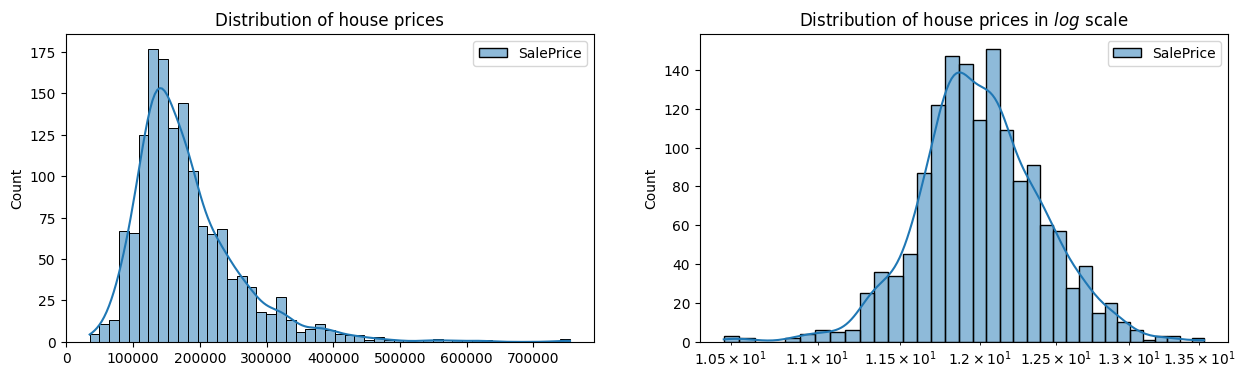

In [173]:
# visualization de la target 

log_y = np.log(Y)
## representation graphique de la distribution de la target y 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

## distribution brut de la variable target y
sns.histplot(Y, color='b', kde=True, ax=axes[0])
axes[0].set_title('Distribution of house prices')

## distribution de log_y de la variable target y
sns.histplot(log_y, color='r', kde=True, ax=axes[1])
axes[1].set_title('Distribution of house prices in $log$ scale')
axes[1].set_xscale('log');

In [174]:
## tendance du log_y

log_y.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1459.0,12.024048,0.399589,10.460242,11.774905,12.001505,12.273731,13.534473


In [175]:
## standardization de log_y

Y = scaler.fit_transform(log_y)
#pd.DataFrame(Y).T

In [176]:
## identification des train_set et test_set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 56 )
print(f'X_train.shape: {X_train.shape}\nX_test.shape:{X_test.shape}\nY_train.shape:{Y_train.shape}\nY_test.shape:{Y_test.shape}')

X_train.shape: (1167, 110)
X_test.shape:(292, 110)
Y_train.shape:(1167, 1)
Y_test.shape:(292, 1)


**<h3 style = "font-family: Century Schoolbook" id = "importation">2.2- Modelisation </h3>**

In [177]:
def rmse_cv(model):
    # cross_val_score effectue la validation croisée en utilisant le modèle spécifié
    # scoring="neg_mean_squared_error" signifie que la fonction de score est l'opposé de l'erreur quadratique moyenne (négatif)
    # cv=5 spécifie une validation croisée à 5 plis
    scores = cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)
    
    # La valeur retournée par cross_val_score est négative, donc on prend la racine carrée positive pour obtenir le RMSE
    rmse = np.sqrt(-scores)
    
    # On prend la moyenne des RMSE obtenus à travers les plis pour obtenir une mesure globale
    rmse_mean = rmse.mean()
    
    # On retourne le RMSE moyen
    return rmse_mean
    

# Cette fonction permet d'évaluer le modele. Comme nous predisons log(Y) alors pour calculer les erreurs nous passons à l'exponetiel
def evaluation(y, predictions):
    mae = mean_absolute_error(np.exp(y), np.exp(predictions))
    mse = mean_squared_error(np.exp(y), np.exp(predictions))
    rmse = np.sqrt(mean_squared_error(np.exp(y), np.exp(predictions)))
    r_squared = r2_score(np.exp(y), np.exp(predictions))
    return mae, mse, rmse, r_squared

In [178]:
## le modele

models=pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

**<h4 style = "font-family: Century Schoolbook" id = "importation">2.2.1- Modèles linéaires </h3>**

Nous allons utiliser la feature selection pour sélectionner les caractéristiques les plus importantes pour améliorer les performances du modèle ou réduire la complexité du modèle. Cela peut aider à éliminer le bruit, à accélérer l'entraînement du modèle et à améliorer la généralisation.

Nous allons donc utiliser la fonction **RFECV** qui permet de sélectionner les variables de façon recursive en faisant un cross validation. Nous spécifions que le processus de sélection des caractéristiques continuera jusqu'à ce qu'il atteigne le nombre minimal spécifié de caractéristiques à conserver, qui est 30 dans ce cas. 

* **Linear Model Regression**

In [138]:
# Creation d'un pipeline 
lin_reg = Pipeline([
     ('feature_selection', RFECV(LinearRegression(), min_features_to_select= 30, cv=5)),  
    ('regressor', LinearRegression())
])


lin_reg.fit(X_train, Y_train)

mae, mse, rmse, r_squared = evaluation(Y_test, lin_reg_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.41796997536370667
MSE: 0.7979437220763671
RMSE: 0.8932769570947003
R2 Score: 0.8227318602065832
------------------------------
RMSE Cross-Validation: 197868262582.91888


- **Ridge Regression**

In [139]:
# Creation d'un pipeline 
ridge = Pipeline([
     ('feature_selection', RFECV(Ridge(), min_features_to_select= 30, cv=5)),  
    ('regressor', Ridge())
])

ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, ridge_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.3911969103796301
MSE: 0.7536321521280199
RMSE: 0.8681198950191269
R2 Score: 0.8325759499070816
------------------------------
RMSE Cross-Validation: 0.3727590445968112


- **Lasso Regression**

In [140]:
# Creation d'un pipeline 
lasso = Pipeline([
     ('feature_selection', RFECV(Lasso(), min_features_to_select= 30, cv=5)),  
    ('regressor', Lasso())
])


lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, lasso_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.1360592799939344
MSE: 4.956227635549683
RMSE: 2.226258663217211
R2 Score: -0.10105666482395459
------------------------------
RMSE Cross-Validation: 0.9976905196675983


- **Elastic Net**

In [141]:
# Creation d'un pipeline 
elastic_net = Pipeline([
     ('feature_selection', RFECV(ElasticNet(), min_features_to_select= 30, cv=5)),  
    ('regressor', ElasticNet())
])


elastic_net.fit(X_train, Y_train)
elastic_pred = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, elastic_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.9689301616919338
MSE: 4.106136165959649
RMSE: 2.0263603248089046
R2 Score: 0.08779642004818289
------------------------------
RMSE Cross-Validation: 0.7975502611905967


* **SGDRegressor**

In [142]:
# Creation d'un pipeline 
sgd = Pipeline([
     ('feature_selection', RFECV(SGDRegressor(eta0=0.007), min_features_to_select= 30, cv=5)),  
    ('regressor', SGDRegressor(eta0=0.007))
])

sgd.fit(X_train, Y_train)
SGD_predict= sgd.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, SGD_predict)
#print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(sgd)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SGDRegressor", "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MSE: 0.8623237985450496
RMSE: 0.9286139125304174
R2 Score: 0.8084294274915739
------------------------------
RMSE Cross-Validation: 0.37004163727820727


**<h4 style = "font-family: Century Schoolbook" id = "importation">2.2.1- Modèles ensemblistes </h3>**

- **Random Forest Regressor**

In [143]:
# # Creation d'un pipeline 
# random_forest = Pipeline([
#      ('feature_selection', RFECV(RandomForestRegressor(random_state = 0), min_features_to_select= 10, cv=5)),  
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state = 0))
# ])

# random_forest.fit(X_train, Y_train)
# RDF_pred = random_forest.predict(X_test)

# mae, mse, rmse, r_squared = evaluation(Y_test, RDF_pred)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R2 Score:", r_squared)
# print("-"*30)
# rmse_cross_val = rmse_cv(random_forest)
# print("RMSE Cross-Validation:", rmse_cross_val)

# new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
# models = models.append(new_row, ignore_index=True)

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)
RDF_pred = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, RDF_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.4108664554400286
MSE: 0.7140185229333125
RMSE: 0.8449961674074696
R2 Score: 0.84137636297323
------------------------------
RMSE Cross-Validation: 0.36544686452169495


- **XGBoost Regressor**

In [144]:
# # Creation d'un pipeline 
# xgb = Pipeline([
#      ('feature_selection', RFECV(XGBRegressor(learning_rate=0.01), min_features_to_select= 10, cv=5)),  
#     ('regressor', XGBRegressor(n_estimators=1500, learning_rate=0.01))
# ])

# xgb.fit(X_train, Y_train)
# xgb_pred = xgb.predict(X_test)

# mae, mse, rmse, r_squared = evaluation(Y_test, xgb_pred)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R2 Score:", r_squared)
# print("-"*30)
# rmse_cross_val = rmse_cv(xgb)
# print("RMSE Cross-Validation:", rmse_cross_val)

# new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
# models = models.append(new_row, ignore_index=True)


xgb = XGBRegressor(n_estimators=1500, learning_rate=0.01)
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, xgb_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.3802891719866145
MSE: 0.6371221173557147
RMSE: 0.7981992967647332
R2 Score: 0.8584593757176254
------------------------------
RMSE Cross-Validation: 0.33754888025070845


**<h4 style = "font-family: Century Schoolbook" id = "importation">2.2.3- Comparaison des modèles </h3>**

- **Comparaison des modèles**

In [145]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,0.380289,0.637122,0.798199,0.858459,3.375489e-01
5,RandomForestRegressor,0.410866,0.714019,0.844996,0.841376,3.654469e-01
1,Ridge,0.391197,0.753632,0.868120,0.832576,3.727590e-01
0,LinearRegression,0.417970,0.797944,0.893277,0.822732,1.978683e+11
4,SGDRegressor,NaN,0.862324,0.928614,0.808429,3.700416e-01
3,ElasticNet,0.968930,4.106136,2.026360,0.087796,7.975503e-01
2,Lasso,1.136059,4.956228,2.226259,-0.101057,9.976905e-01


In [146]:
# Vérifions si le modèle est en overfitting ou non
xgb_pred_train = xgb.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_test, xgb_pred)
mae_train, mse_train, rmse_train, r_squared_train = evaluation(Y_train, xgb_pred_train)
results = [{"Model": "Train","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}, {"Model": "Test","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}]

pd.DataFrame(results)

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,Train,0.380289,0.637122,0.798199,0.858459,0.337549
1,Test,0.380289,0.637122,0.798199,0.858459,0.337549


Les performances du modèle pour l'apprentissage et le test sont les memes. Il n'est donc pas en **overfitting**

**<h3 style = "font-family: Century Schoolbook" id = "importation">2.3- Optimisation du meilleur modèle obtenu par la méthode </h3>**

In [147]:
# selection des paramètres à optimiser

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


- Les valeurs [0.01, 0.1, 0.2] de *learning_rate* sont couramment utilisées comme points de départ, car elles couvrent un éventail de taux d'apprentissage de faible à élevé. Une valeur plus basse comme 0.01 peut être un bon point de départ pour garantir une convergence lente et stable. Des valeurs plus élevées comme 0.1 ou 0.2 peuvent être explorées pour des ajustements plus rapides.

- Les valeurs [3, 5, 7] de *max_depth* sont souvent choisies car elles représentent différentes profondeurs d'arbres. Une profondeur plus basse, comme 3, peut aider à éviter le surajustement, tandis qu'une profondeur plus élevée, comme 7, permet au modèle de capturer des motifs plus complexes. Ces valeurs sont généralement sélectionnées pour explorer un compromis entre complexité et capacité de généralisation.

In [148]:
# Validation croisée
grid_search = GridSearchCV(xgb, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.01,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1500,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [149]:
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'learning_rate': 0.01, 'max_depth': 3}


In [150]:
print(f"RMSE: { np.sqrt(- grid_search.best_score_): .3f}")

RMSE:  0.312


le meilleur modèle est donc **XGBRegressor(learning_rate = 0.01,  max_depth= 3)**

In [179]:


xgb = XGBRegressor(n_estimators=1500, learning_rate=0.01,  max_depth= 3)


xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred_train = xgb.predict(X_train)

mae, mse, rmse, r_squared = evaluation(Y_test, xgb_pred)
mae_train, mse_train, rmse_train, r_squared_train = evaluation(Y_train, xgb_pred_train)
results = [{"Model": "Train","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}, {"Model": "Test","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}]

pd.DataFrame(results)

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,Train,0.378987,0.678964,0.823993,0.849164,0.337549
1,Test,0.378987,0.678964,0.823993,0.849164,0.337549


Les resultats du train et du test sont pratiquement les memes. Donc il n'y a pas d'overfitting. 

* **Feature Importance**

In [160]:
xgb = XGBRegressor(n_estimators=1500, learning_rate = 0.01, max_depth= 3)

xgb.fit(X_train, Y_train)

importances =xgb.feature_importances_

In [161]:
importances

array([1.62277487e-04, 1.41075313e-01, 2.86925933e-03, 2.55596451e-02,
       2.47426727e-03, 4.48645931e-03, 5.74598135e-03, 1.00035022e-03,
       4.34517441e-03, 1.02821395e-01, 2.39300821e-03, 2.19361093e-02,
       3.23796868e-02, 9.50278062e-03, 6.55127296e-05, 2.13872106e-03,
       4.53016051e-04, 8.87693837e-04, 3.41194607e-02, 1.27102584e-02,
       1.55312009e-03, 0.00000000e+00, 5.15150372e-03, 1.38468063e-03,
       7.19926087e-04, 1.30566373e-03, 3.19723418e-04, 1.29808497e-04,
       4.62155469e-04, 1.01794474e-04, 5.45071252e-03, 8.54030484e-04,
       3.94755788e-03, 4.62707318e-03, 1.07889622e-03, 0.00000000e+00,
       3.31852725e-03, 1.05599966e-03, 2.69723561e-04, 0.00000000e+00,
       2.17492779e-04, 1.50531542e-03, 6.02703134e-04, 1.14681455e-03,
       4.19408054e-04, 4.56250331e-04, 6.18677645e-04, 3.94939823e-04,
       0.00000000e+00, 0.00000000e+00, 1.51968573e-03, 0.00000000e+00,
       1.87915959e-03, 6.64034334e-04, 0.00000000e+00, 0.00000000e+00,
      